# t-test

## Steps of Hypothesis Testing

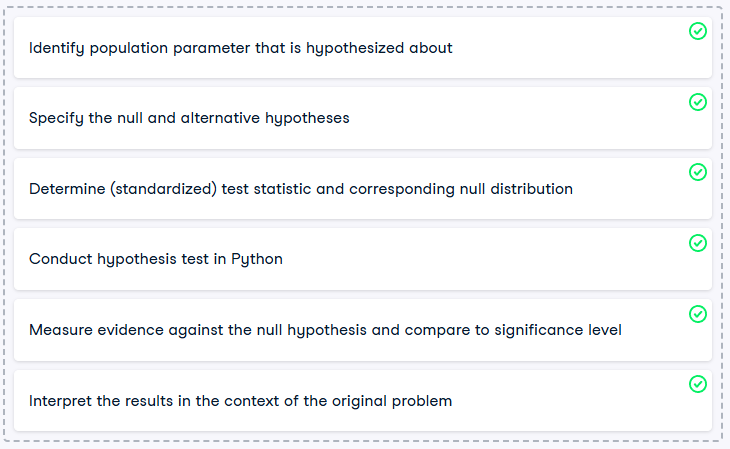

## Two sample mean test statistic
The hypothesis test for determining if there is a difference between the means of two populations uses a different type of test statistic to the z-scores you saw in Chapter 1. It's called "t", and it can be calculated from three values from each sample using this equation.

 
 
 

While trying to determine why some shipments are late, you may wonder if the weight of the shipments that were on time is less than the weight of the shipments that were late. The late_shipments dataset has been split into a "yes" group, where late == "Yes" and a "no" group where late == "No". The weight of the shipment is given in the weight_kilograms variable.

The sample means for the two groups are available as xbar_no and xbar_yes. The sample standard deviations are s_no and s_yes. The sample sizes are n_no and n_yes. numpy is also loaded as np.


* Calculate the numerator of the test statistic.
* Calculate the denominator of the test statistic.
* Use those two numbers to calculate the  test statistic.

In [6]:
import pandas as pd

late_shipments = pd.read_feather('/kaggle/input/late-shipments-dataset-to-perform-hypothesis-test/late_shipments.feather')
print(late_shipments)

          id       country managed_by  fulfill_via vendor_inco_term  \
0    36203.0       Nigeria   PMO - US  Direct Drop              EXW   
1    30998.0      Botswana   PMO - US  Direct Drop              EXW   
2    69871.0       Vietnam   PMO - US  Direct Drop              EXW   
3    17648.0  South Africa   PMO - US  Direct Drop              DDP   
4     5647.0        Uganda   PMO - US  Direct Drop              EXW   
..       ...           ...        ...          ...              ...   
995  13608.0        Uganda   PMO - US  Direct Drop              DDP   
996  80394.0    Congo, DRC   PMO - US  Direct Drop              EXW   
997  61675.0        Zambia   PMO - US  Direct Drop              EXW   
998  39182.0  South Africa   PMO - US  Direct Drop              DDP   
999   5645.0      Botswana   PMO - US  Direct Drop              EXW   

    shipment_mode  late_delivery late product_group    sub_classification  \
0             Air            1.0  Yes          HRDT              HIV t

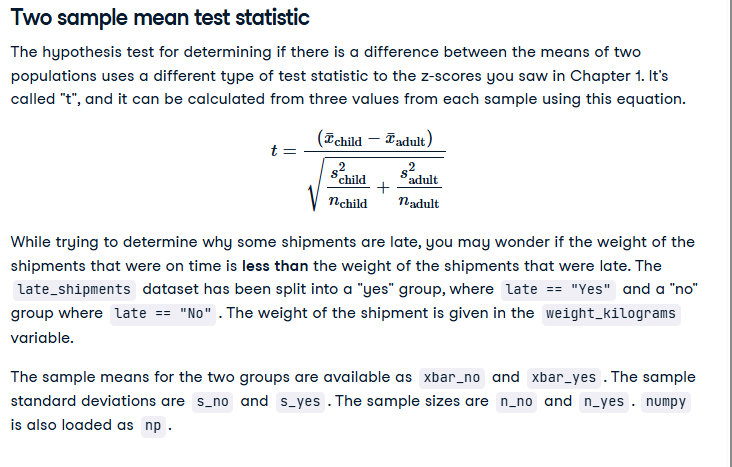

* Calculate the numerator of the test statistic.
* Calculate the denominator of the test statistic.
* Use those two numbers to calculate the test statistic.

In [7]:
import pandas as pd
import numpy as np

# Assuming late_shipments is already loaded
# Calculate the sample statistics using groupby (similar to your example)
xbar = late_shipments.groupby('late')['weight_kilograms'].mean()
s = late_shipments.groupby('late')['weight_kilograms'].std()
n = late_shipments.groupby('late')['weight_kilograms'].count()

# Extract values for each group
xbar_no = xbar['No']    # Mean for on-time shipments
xbar_yes = xbar['Yes']  # Mean for late shipments
s_no = s['No']          # Standard deviation for on-time
s_yes = s['Yes']        # Standard deviation for late
n_no = n['No']          # Sample size for on-time
n_yes = n['Yes']        # Sample size for late

# Print the calculated values (similar to your example output)
print("Sample means:")
print(xbar)
print("\nSample standard deviations:")
print(s)
print("\nSample sizes:")
print(n)

# Calculate the numerator of the test statistic
numerator = xbar_no - xbar_yes

# Calculate the denominator of the test statistic
denominator = np.sqrt(s_no ** 2 / n_no + s_yes ** 2 / n_yes)

# Calculate the test statistic
t_stat = numerator / denominator

# Print the test statistic
print(f"\nT-test statistic: {t_stat:.4f}")

Sample means:
late
No     1897.791267
Yes    2715.672131
Name: weight_kilograms, dtype: float64

Sample standard deviations:
late
No     3154.039507
Yes    2544.688211
Name: weight_kilograms, dtype: float64

Sample sizes:
late
No     939
Yes     61
Name: weight_kilograms, dtype: int64

T-test statistic: -2.3937


In [8]:
# Calculate the numerator of the test statistic
numerator = xbar_no - xbar_yes

# Calculate the denominator of the test statistic
denominator = np.sqrt(s_no ** 2 / n_no + s_yes ** 2 / n_yes)
# Calculate the test statistic
t_stat = numerator / denominator

# Print the test statistic
print(t_stat)

-2.3936661778766433


 When testing for differences between means, the test statistic is called 't' rather than 'z', and can be calculated using six numbers from the samples. Here, the value is about -2.39 or 2.39, depending on the order you calculated the numerator.

The process for calculating p-values is to start with the sample statistic, standardize it to get a test statistic, then transform it via a cumulative distribution function. In Chapter 1, that final transformation was denoted , and the CDF transformation used the (standard normal) z-distribution. In the last video, the test statistic was denoted , and the transformation used the t-distribution.

In which hypothesis testing scenario is a t-distribution needed instead of the z-distribution?


* When a sample standard deviation is used in estimating a standard error.
  
Using a sample standard deviation to estimate the standard error is computationally easier than using bootstrapping. However, to correct for the approximation, you need to use a t-distribution when transforming the test statistic to get the p-value.

# From t to p
Previously, you calculated the test statistic for the two-sample problem of whether the mean weight of shipments is smaller for shipments that weren't late (late == "No") compared to shipments that were late (late == "Yes"). In order to make decisions about it, you need to transform the test statistic with a cumulative distribution function to get a p-value.

Recall the hypotheses:

H0 : The mean weight of shipments that weren't late is the same as the mean weight of shipments that were late.

H1 : The mean weight of shipments that weren't late is less than the mean weight of shipments that were late.

* The test statistic, t_stat, is available, as are the samples sizes for each group, n_no and n_yes. Use a significance level of alpha = 0.05.

t has also been imported from scipy.stats.

In [9]:
from scipy.stats import t

# Calculate the degrees of freedom
degrees_of_freedom = n_no + n_yes - 2

# Calculate the p-value from the test stat
p_value = t.cdf(t_stat, df=degrees_of_freedom)

# Print the p_value
print(p_value)

0.008432382146249523


### Reject the null hypothesis.

Perspicacious p-value predictions! When the standard error is estimated from the sample standard deviation and sample size, the test statistic is transformed into a p-value using the t-distribution.

# Paired t-test

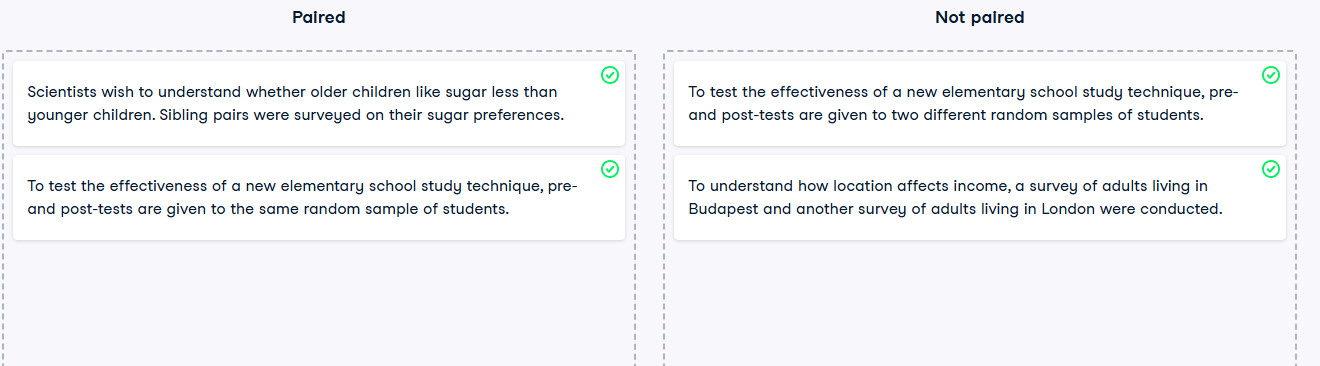

## Visualizing the difference
Before you start running hypothesis tests, it's a great idea to perform some exploratory data analysis; that is, calculating summary statistics and visualizing distributions.

Here, you'll look at the proportion of county-level votes for the Democratic candidate in 2012 and 2016, sample_dem_data. Since the counties are the same in both years, these samples are paired. The columns containing the samples are dem_percent_12 and dem_percent_16.

dem_votes_potus_12_16 is available as sample_dem_data. pandas and matplotlib.pyplot are loaded with their usual aliases.


* Create a new diff column containing the percentage of votes for the democratic candidate in 2012 minus the percentage of votes for the democratic candidate in 2016.
* Calculate the mean of the diff column as xbar_diff.
* Calculate the standard deviation of the diff column as s_diff.
* Plot a histogram of the diff column with 20 bins.

In [10]:
import pandas as pd

dem_votes_potus_12_16= pd.read_csv("/kaggle/input/2012-2016-presidential-elections/US_County_Level_Presidential_Results_12-16.csv")
print(dem_votes_potus_12_16)

      Unnamed: 0  combined_fips  votes_dem_2016  votes_gop_2016  \
0              0           2013         93003.0        130413.0   
1              1           2016         93003.0        130413.0   
2              2           2020         93003.0        130413.0   
3              3           2050         93003.0        130413.0   
4              4           2060         93003.0        130413.0   
...          ...            ...             ...             ...   
3136        3136          56037          3233.0         12153.0   
3137        3137          56039          7313.0          3920.0   
3138        3138          56041          1202.0          6154.0   
3139        3139          56043           532.0          2911.0   
3140        3140          56045           294.0          2898.0   

      total_votes_2016  per_dem_2016  per_gop_2016  diff_2016  \
0             246588.0      0.377159      0.528870      37410   
1             246588.0      0.377159      0.528870      37410   


/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


In [11]:
# Create the sample_dem_data dataframe with the required columns
sample_dem_data = dem_votes_potus_12_16.copy()

# Create dem_percent_12 column (percentage of democratic votes in 2012)
sample_dem_data['dem_percent_12'] = sample_dem_data['votes_dem_2012'] / sample_dem_data['total_votes_2012']

# Create dem_percent_16 column (percentage of democratic votes in 2016)
sample_dem_data['dem_percent_16'] = sample_dem_data['votes_dem_2016'] / sample_dem_data['total_votes_2016']

# Remove any rows with NaN values in these columns (where 2012 data might be missing)
sample_dem_data = sample_dem_data.dropna(subset=['dem_percent_12', 'dem_percent_16'])

# Calculate the differences from 2012 to 2016
sample_dem_data['diff'] = sample_dem_data['dem_percent_12'] - sample_dem_data['dem_percent_16']

# Find the mean of the diff column
xbar_diff = sample_dem_data['diff'].mean()

# Find the standard deviation of the diff column
s_diff = sample_dem_data['diff'].std()

# Print the results
print(f"Number of counties with complete data: {len(sample_dem_data)}")
print(f"Mean difference (2012 - 2016): {xbar_diff:.6f}")
print(f"Standard deviation of differences: {s_diff:.6f}")

# Optional: Show some sample data
print("\nSample of the data:")
print(sample_dem_data[['dem_percent_12', 'dem_percent_16', 'diff']].head())

Number of counties with complete data: 3112
Mean difference (2012 - 2016): 0.067872
Standard deviation of differences: 0.049541

Sample of the data:
    dem_percent_12  dem_percent_16      diff
29        0.265758        0.239569  0.026189
30        0.215666        0.195653  0.020013
31        0.512523        0.466603  0.045920
32        0.262186        0.214220  0.047965
33        0.123478        0.084699  0.038779


In [12]:
# Calculate the differences from 2012 to 2016
sample_dem_data['diff'] = sample_dem_data['dem_percent_12'] - sample_dem_data['dem_percent_16']
print(sample_dem_data)

# Find the mean of the diff column
xbar_diff = sample_dem_data['diff'].mean()
print(xbar_diff)

# Find the standard deviation of the diff column
s_diff = sample_dem_data['diff'].std()
print(s_diff)


      Unnamed: 0  combined_fips  votes_dem_2016  votes_gop_2016  \
29            29           1001          5908.0         18110.0   
30            30           1003         18409.0         72780.0   
31            31           1005          4848.0          5431.0   
32            32           1007          1874.0          6733.0   
33            33           1009          2150.0         22808.0   
...          ...            ...             ...             ...   
3136        3136          56037          3233.0         12153.0   
3137        3137          56039          7313.0          3920.0   
3138        3138          56041          1202.0          6154.0   
3139        3139          56043           532.0          2911.0   
3140        3140          56045           294.0          2898.0   

      total_votes_2016  per_dem_2016  per_gop_2016  diff_2016  \
29             24661.0      0.239569      0.734358      12202   
30             94090.0      0.195653      0.773515      54371   


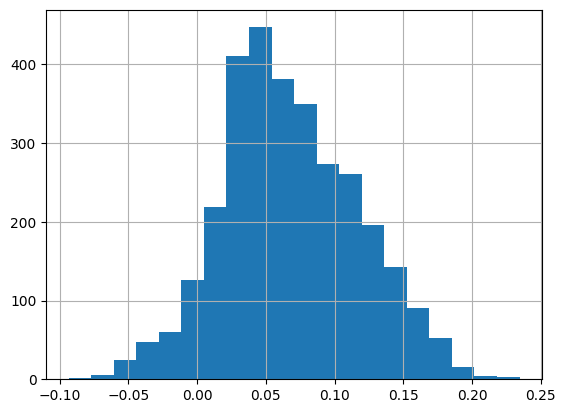

In [13]:
import matplotlib.pyplot as plt

# Plot a histogram of diff with 20 bins
sample_dem_data['diff'].hist(bins=20)
plt.show()

### Using ttest()
Manually calculating test statistics and transforming them with a CDF to get a p-value is a lot of effort to compare two sample means. The comparison of two sample means is called a t-test, and the pingouin Python package has a .ttest() method to accomplish it. This method provides some flexibility in how you perform the test.

As in the previous exercise, you'll explore the difference between the proportion of county-level votes for the Democratic candidate in 2012 and 2016 to identify if the difference is significant. The hypotheses are as follows:

: The proportion of democratic votes in 2012 and 2016 were the same. 
: The proportion of democratic votes in 2012 and 2016 were different.

sample_dem_data is available and has the columns diff, dem_percent_12, and dem_percent_16 in addition to the state and county names. pingouin and has been loaded along with pandas as pd.


* Conduct a t-test on the sample differences (the diff column of sample_dem_data), using an appropriate alternative hypothesis chosen from "two-sided", "less", and "greater"
* Conduct a paired test on the democratic votes in 2012 and 2016 (the dem_percent_12 and dem_percent_16 columns of sample_dem_data), using an appropriate alternative hypothesis.
*


In [14]:
!pip install pingouin

In [15]:
import pingouin

# Conduct a t-test on diff
test_results = pingouin.ttest(x=sample_dem_data['diff'], y=0, alternative="two-sided")


                              
# Print the test results
print(test_results)

                T   dof alternative  p-val         CI95%   cohen-d BF10  power
T-test  76.426803  3111   two-sided    0.0  [0.07, 0.07]  1.370017  inf    1.0


In [16]:
# Conduct a t-test on diff
test_results = pingouin.ttest(x=sample_dem_data['diff'], 
                              y=0, 
                              alternative="two-sided")

# Conduct a paired t-test on dem_percent_12 and dem_percent_16
paired_test_results = pingouin.ttest(x=sample_dem_data['dem_percent_12'], y=sample_dem_data["dem_percent_16"], paired=True, alternative="two-sided")



                              
# Print the paired test results
print(paired_test_results)

                T   dof alternative  p-val         CI95%   cohen-d BF10 power
T-test  76.426803  3111   two-sided    0.0  [0.07, 0.07]  0.450004  inf   NaN


! Using .ttest() lets you avoid manual calculation to run your test. When you have paired data, a paired t-test is preferable to the unpaired version because it reduces the chance of a false negative error.

# ANOVA TEST

## Visualizing many categories
So far in this chapter, we've only considered the case of differences in a numeric variable between two categories. Of course, many datasets contain more categories. Before you get to conducting tests on many categories, it's often helpful to perform exploratory data analysis (EDA), calculating summary statistics for each group and visualizing the distributions of the numeric variable for each category using box plots.

Here, we'll return to the late shipments data, and how the price of each package (pack_price) varies between the three shipment modes (shipment_mode): "Air", "Air Charter", and "Ocean".

late_shipments is available; pandas and matplotlib.pyplot are loaded with their standard aliases, and seaborn is loaded as sns.


* Group late_shipments by shipment_mode and calculate the mean pack_price for each group, storing the result in xbar_pack_by_mode.
* Group late_shipments by shipment_mode and calculate the standard deviation pack_price for each group, storing the result in s_pack_by_mode.
* Create a boxplot from late_shipments with "pack_price" as x and "shipment_mode" as y.



In [17]:
# Calculate the mean pack_price for each shipment_mode
xbar_pack_by_mode = late_shipments.groupby("shipment_mode")['pack_price'].mean()
print(xbar_pack_by_mode)

# Calculate the standard deviation of the pack_price for each shipment_mode
s_pack_by_mode = late_shipments.groupby("shipment_mode")['pack_price'].std()

# Print the grouped standard deviations
print(s_pack_by_mode)

shipment_mode
Air            39.712395
Air Charter     4.226667
Ocean           6.432273
Name: pack_price, dtype: float64
shipment_mode
Air            48.932861
Air Charter     0.992969
Ocean           5.303047
Name: pack_price, dtype: float64


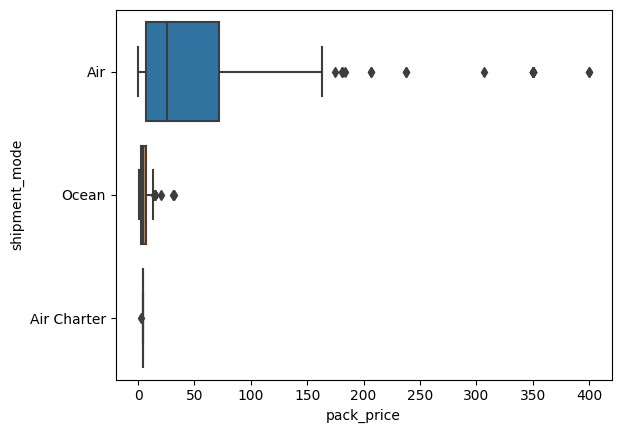

In [19]:
import seaborn as sns
# Boxplot of shipment_mode vs. pack_price
sns.boxplot(x="pack_price", y="shipment_mode", data= late_shipments)
plt.show()

There certainly looks to be a difference in the pack price between each of the three shipment modes. Do you think the differences are statistically significant?

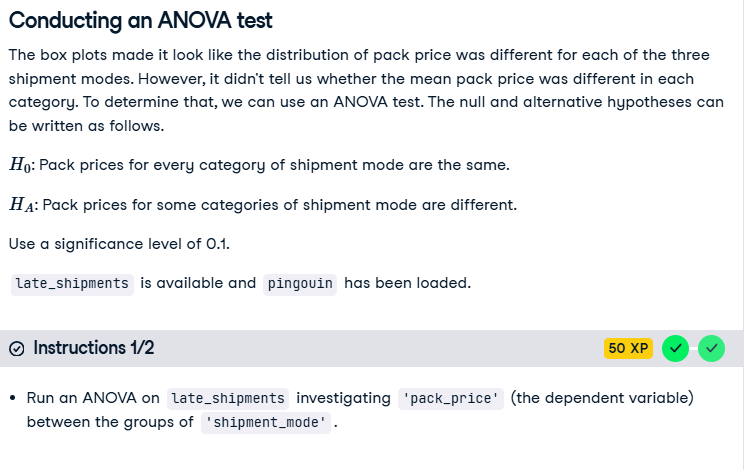

In [20]:
# Run an ANOVA for pack_price across shipment_mode
anova_results = pingouin.anova(data=late_shipments, dv="pack_price", between="shipment_mode")



# Print anova_results
print(anova_results)

          Source  ddof1  ddof2        F         p-unc       np2
0  shipment_mode      2    997  21.8646  5.089479e-10  0.042018


#### Assuming a significance level of 0.1, should you reject the null hypothesis that there is no difference in pack prices between shipment modes?

**Yes. The p-value is less than or equal to the significance level, so the null hypothesis should be rejected.**

There is a significant difference in pack prices between the shipment modes. However, we don't know which shipment modes this applies to.

## Pairwise t-tests
The ANOVA test didn't tell you which categories of shipment mode had significant differences in pack prices. To pinpoint which categories had differences, you could instead use pairwise t-tests.

* Perform pairwise t-tests on late_shipments's pack_price variable, grouped by shipment_mode, without doing any p-value adjustment.
* Modify the pairwise t-tests to use the Bonferroni p-value adjustment.

In [21]:
# Perform a pairwise t-test on pack price, grouped by shipment mode
pairwise_results = pingouin.pairwise_tests(data=late_shipments, dv="pack_price", between="shipment_mode",
padjust="none") 




# Print pairwise_results
print(pairwise_results)

        Contrast            A            B  Paired  Parametric          T  \
0  shipment_mode          Air  Air Charter   False        True  21.179625   
1  shipment_mode          Air        Ocean   False        True  19.335760   
2  shipment_mode  Air Charter        Ocean   False        True  -3.170654   

          dof alternative         p-unc       BF10    hedges  
0  600.685682   two-sided  8.748346e-75  5.809e+76  0.726592  
1  986.979785   two-sided  6.934555e-71  1.129e+67  0.711119  
2   35.615026   two-sided  3.123012e-03     15.277 -0.423775  


In [22]:
# Modify the pairwise t-tests to use Bonferroni p-value adjustment
pairwise_results = pingouin.pairwise_tests(data=late_shipments, 
                                           dv="pack_price",
                                           between="shipment_mode",
                                           padjust="bonf")

# Print pairwise_results
print(pairwise_results)

        Contrast            A            B  Paired  Parametric          T  \
0  shipment_mode          Air  Air Charter   False        True  21.179625   
1  shipment_mode          Air        Ocean   False        True  19.335760   
2  shipment_mode  Air Charter        Ocean   False        True  -3.170654   

          dof alternative         p-unc        p-corr p-adjust       BF10  \
0  600.685682   two-sided  8.748346e-75  2.624504e-74     bonf  5.809e+76   
1  986.979785   two-sided  6.934555e-71  2.080367e-70     bonf  1.129e+67   
2   35.615026   two-sided  3.123012e-03  9.369037e-03     bonf     15.277   

     hedges  
0  0.726592  
1  0.711119  
2 -0.423775  


### Question
**Using the Bonferroni correction results and assuming a significance level of 0.1, for which pairs of shipment modes should you reject the null hypothesis that the pack prices are equal?**


"Ocean" and "Air Charter"; "Ocean" and "Air"; "Air Charter" and "Air".

After applying the Bonferroni adjustment, the p-values for the t-tests between each of the three groups are all less than 0.1.